# Workflow:
## Newly measured data will have to be converted to h5 files using convert_to_h5( directory )
## Then you load all the files in that directory using load_files( directory ) 

In [1]:
# Import packages

# Ensure that this code works on both python 2 and python 3
from __future__ import division, print_function, absolute_import, unicode_literals

# basic numeric computation:
import numpy as np

# The package used for creating and manipulating HDF5 files:
import h5py

# Plotting and visualization:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mpltick

# for downloading files:
import wget
import os

# multivariate analysis:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import subprocess
import sys

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
# Package for downloading online files:
# finally import pycroscopy:
import pyUSID as usid
import pycroscopy as px

from pycroscopy.viz import cluster_utils

In [2]:
import matplotlib.pyplot as plt
from vlabs.spm import *


diry = r"data"
load_files(diry)

#spm.load_files(diry)


([<HDF5 file "P0125OP0000.h5" (mode r)>,
  <HDF5 file "P0125OP0001.h5" (mode r)>,
  <HDF5 file "P0125OP0002.h5" (mode r)>,
  <HDF5 file "P0125OP0003.h5" (mode r)>,
  <HDF5 file "P0125OP0004.h5" (mode r)>,
  <HDF5 file "P0125OP0005.h5" (mode r)>,
  <HDF5 file "P0125OP0006.h5" (mode r)>,
  <HDF5 file "P0125OP0007.h5" (mode r)>,
  <HDF5 file "P0142OP0000.h5" (mode r)>,
  <HDF5 file "P0142OP0001.h5" (mode r)>],
 ['P0125OP0000.h5',
  'P0125OP0001.h5',
  'P0125OP0002.h5',
  'P0125OP0003.h5',
  'P0125OP0004.h5',
  'P0125OP0005.h5',
  'P0125OP0006.h5',
  'P0125OP0007.h5',
  'P0142OP0000.h5',
  'P0142OP0001.h5'])

##### Here we define the arrays for the data and the directory we are using

In [3]:
import os

scans = []
topo, ampl1, ampl2, phase1, phase2 = [], [], [], [], []
experiment = []

# Here you can paste the directory of the scans you want to look at
diry = r"data"



# Only execute the below cell if you want to convert IBW files to h5. This conversion only needs to be done once.

In [4]:

convert_to_h5( diry )

Completed


In [5]:
%qtconsole

# Load files in directory here

In [6]:
expt, fnames = load_files( diry )
j=0
for name in fnames:
    print(name + ' - ' + str(j))
    j += 1

P0125OP0000.h5 - 0
P0125OP0001.h5 - 1
P0125OP0002.h5 - 2
P0125OP0003.h5 - 3
P0125OP0004.h5 - 4
P0125OP0005.h5 - 5
P0125OP0006.h5 - 6
P0125OP0007.h5 - 7
P0142OP0000.h5 - 8
P0142OP0001.h5 - 9


# Use the numbers in previous cell output to pick which scan you want to look at
## The cell below loads the data from one scan into variables representing the topography, amplitude1, phase1, amplitude2, and phase2 channels

In [8]:
i = 3
plt.close(fig='all')
[t1, a1, p1, a2, p2] = get_channels( expt[i], fmt='arr' )


C:\Users\oliver\anaconda3\lib\site-packages\pyUSID\io\usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


In [13]:
t1

array([[-2.7631586e-10,  1.7863044e-10,  5.8170713e-10, ...,
         2.4711824e-09,  1.4054251e-09,  1.3488943e-10],
       [-1.4853185e-10,  3.0243541e-10,  7.0852479e-10, ...,
         2.3484859e-09,  1.3044428e-09,  1.3613999e-11],
       [ 2.0179414e-11,  4.6961190e-10,  8.9747232e-10, ...,
         2.2165807e-09,  1.1875727e-09, -9.7315933e-11],
       ...,
       [-1.4588011e-09, -1.8380604e-09, -2.2131417e-09, ...,
        -1.5521096e-09, -1.8480364e-09, -1.8758328e-09],
       [-1.5426451e-09, -1.9215634e-09, -2.3114239e-09, ...,
        -1.5534738e-09, -1.8368098e-09, -1.8762591e-09],
       [-1.6040929e-09, -1.9886386e-09, -2.3692905e-09, ...,
        -1.5878641e-09, -1.8585808e-09, -1.9281856e-09]], dtype=float32)

# Plotting
### The below cell plots the topography, amplitude and phase of the scan. 
#### You can pick which amplitude or phase channel you use by changing a1 to a2 and vice versa when defining the "channel1" variable
#### You can adjust the topography, amplitude and phase ranges by changing the numbers in the z_range, a_range, and p_range variables

Text(0.8, 0.9, 'P0125OP0003')

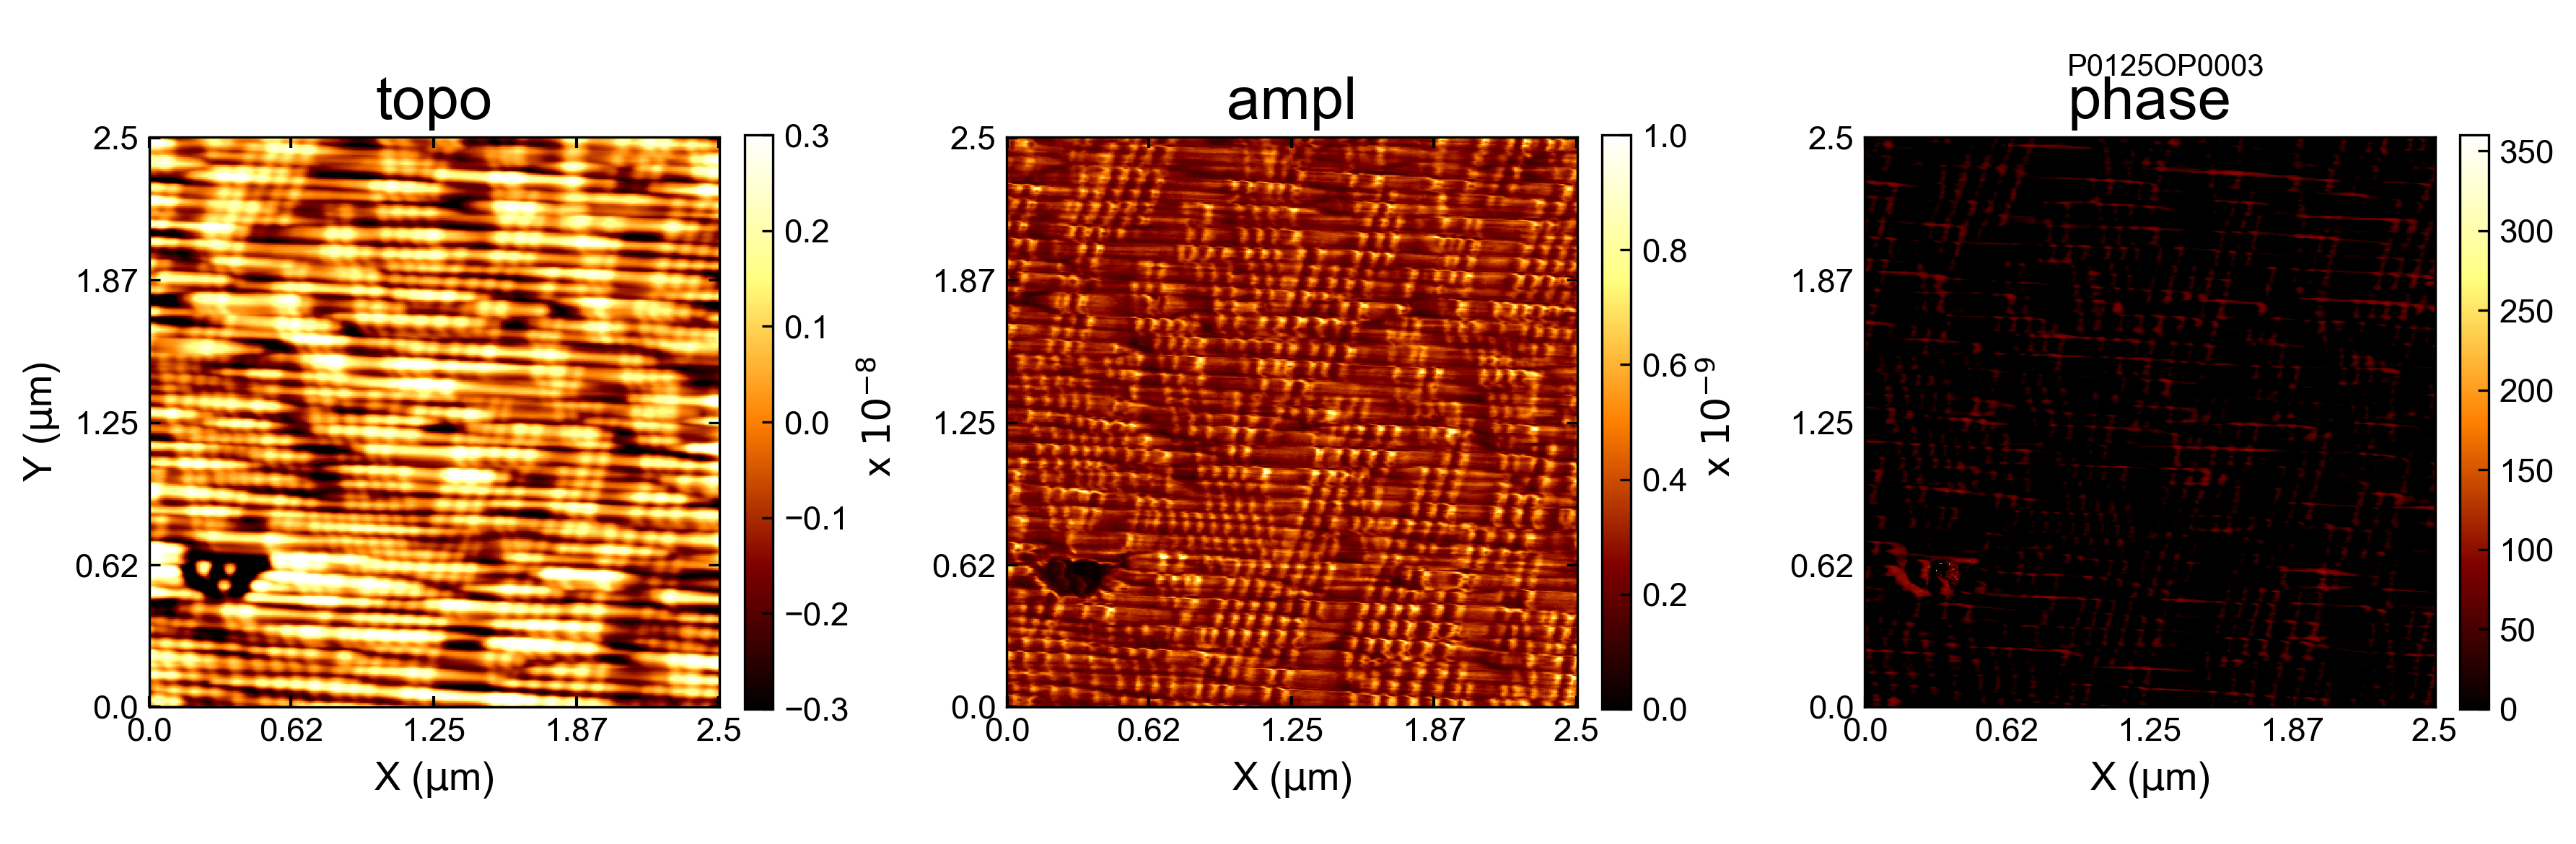

In [13]:

%matplotlib inline
plt.style.use('PFM')

channel1 = [t1.T, a1.T, p1.T]
z_range = (-0.3,0.3)
a_range = (0, 1)
p_range = (0, 360)
ranges = [z_range, a_range, p_range]
fig, ax = plt.subplots( figsize=(12,4) )

gs = gridspec.GridSpec(1,3)
ax.axis('off')

fig, ax = multi_image_plot( channel1, expt[i], fig=fig, axis=ax, gs=gs, zrange=ranges, ntick=5, cmap='afmhot' )

'''
Uncomment the below line to save the figure to a .SVG file. You can also change the filetype it saves 
by just changing the '.svg' section to '.png' or whatever your preference is. 
'''
#plt.savefig(diry + fnames[i][:-3] + '.svg', transparent=True)

fig.text(0.8, 0.9, fnames[i][:-3])


# Roughness calculations

In [14]:
avgT = np.average(t1)
roughness = np.std(t1)
print(roughness)

1.4617609e-09


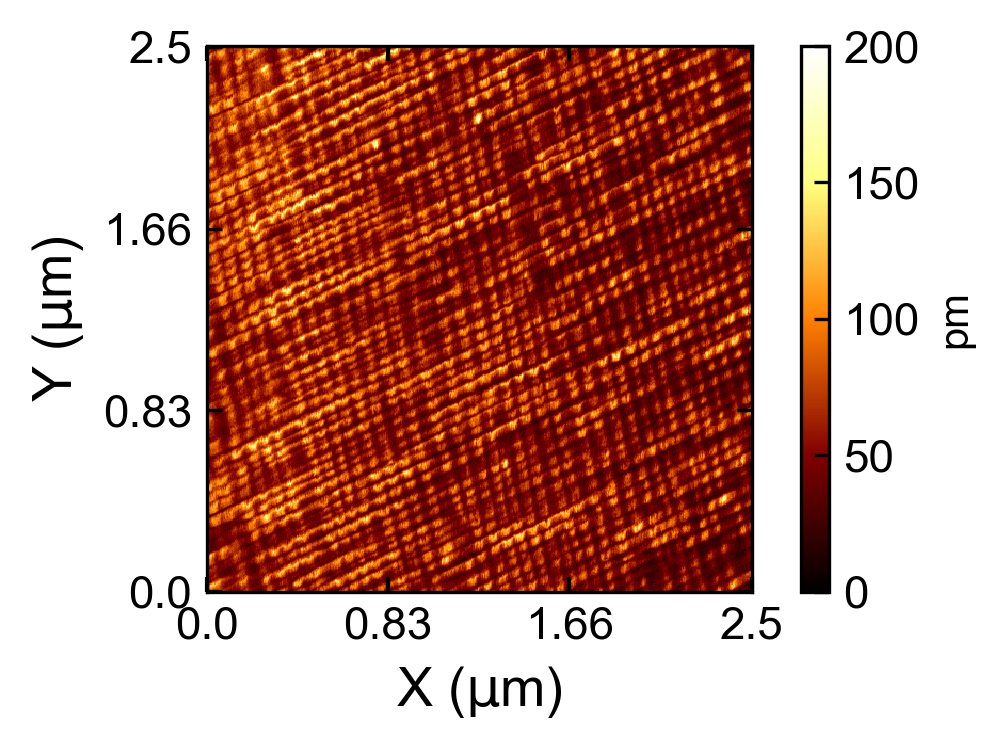

In [73]:
xvec = np.linspace( 0, 
                   usid.hdf_utils.get_attributes(expt[i]['Measurement_000'])['ScanSize']/10**(-6),
                   len(t1))
fig, ax = single_image_plot( a1/10**(-12), fnames[i], xvec, zrange=(0,200), cbar_label='pm')
fig.tight_layout()
plt.savefig(diry + fnames[i][:-3] + '_ampl.svg', transparent=True)

In [179]:
print('Datasets and datagroups within the file:\n------------------------------------')
usid.hdf_utils.print_tree(expt[10])

Datasets and datagroups within the file:
------------------------------------
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data
  ├ Channel_001
    -----------
    ├ Raw_Data
  ├ Channel_002
    -----------
    ├ Raw_Data
  ├ Channel_003
    -----------
    ├ Raw_Data
  ├ Channel_004
    -----------
    ├ Raw_Data
  ├ Channel_005
    -----------
    ├ Raw_Data
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
